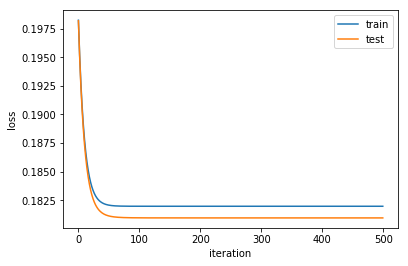

In [5]:
from sklearn.datasets import load_svmlight_file
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot
import pandas as pd
X,y=load_svmlight_file(r'F:\\australian_scale')
X_train,X_validation,y_train,y_validation=train_test_split(X,y,test_size=0.25)#分割数据集
y_train=np.reshape(y_train,(len(y_train),1))
y=np.mat(y)
#添加一列1在最后一列
b=np.ones((np.shape(X_train)[0],1))
#print(X_train.shape)
X_train=np.column_stack((X_train.toarray(),b))
#print(X_train.shape)
b1=np.ones((np.shape(X_validation)[0],1))
X_validation=np.column_stack((X_validation.toarray(),b1))
m=X_train.shape[1]
loss_train=[]#训练集误差
loss_validation=[]#交叉集误差
w = np.zeros((15,))
C = 0.2
iteration = 500
learning_rate = 0.05
def get_loss(X,w,y):
    loss=0
    for i in range(X.shape[0]):
        #loss+=max(0,1-np.sum((y.T)*np.dot(X,w)))
        loss+=max(0,1-y[i]*np.dot(w.T,X[i]))
    loss=(C/X.shape[0])*loss+1/2*(w.T.dot(w))
    return loss

def gradient(X,w,y):
    sum = 0
    for j in range(X.shape[0]):
        if (1-y[j]*np.dot(w.T,X[j]))>=0:
            sum+=-y[j]*X[j]
    w = w + (C/X.shape[0])*sum
    return w

    
    # w初始化为1 维度m*1
loss_train=[]
loss_validation=[]
for i in range(0,iteration):#it次迭代
    gra=gradient(X_train,w,y_train)
    w=w-learning_rate*gra
    loss_train.append(get_loss(X_train,w,y_train))
    loss_validation.append(get_loss(X_validation,w,y_validation))

pyplot.plot(loss_train, mfc='w',label='train')
pyplot.plot(loss_validation, mfc='w',label='test')
pyplot.legend()
pyplot.xlabel("iteration")
pyplot.ylabel("loss")
pyplot.show()
